In [232]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [233]:
cropdf = pd.read_csv("crop_recommendation.csv")
cropdf.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [234]:
cropdf.shape

(2200, 8)

In [235]:
cropdf.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## Check Null and NA values

In [236]:
cropdf['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [237]:
cropdf.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [238]:
cropdf['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

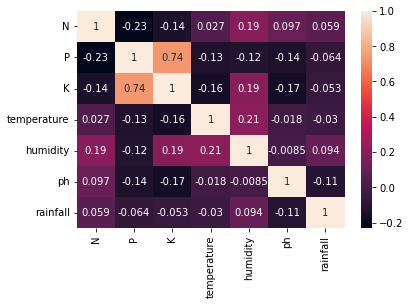

In [239]:
sns.heatmap(cropdf.corr(),annot=True)


## Seperating features and target label


In [240]:
features = cropdf[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = cropdf['label']
#features = cropdf[['temperature', 'humidity', 'ph', 'rainfall']]
labels = cropdf['label']

In [241]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [242]:
# Splitting into train and test data
# Splitting into train and test data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
target = le.fit_transform(target)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree


In [243]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00   

In [244]:
from sklearn.model_selection import cross_val_score

In [245]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

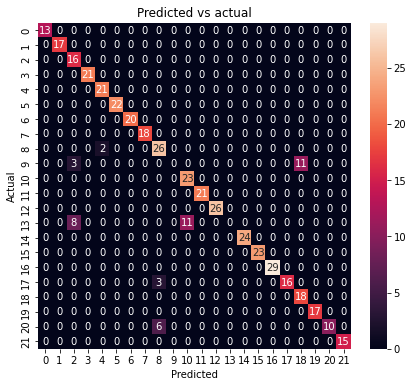

In [246]:
Ypred = DecisionTree.predict(Xtest)
Ytrue = Ytest

cm_dt = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm_dt, annot=True, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [247]:
def scatter_plot(title, y_test, y_predict):
  plt.figure(figsize=(7,7))
  plt.xticks(rotation=90)
  plt.title(title,fontsize = 16)
  plt.xlabel('Actual',fontsize = 15)
  plt.ylabel('Predictions', fontsize =15)
  plt.scatter(le.inverse_transform(y_test),le.inverse_transform(y_predict))
  plt.show()

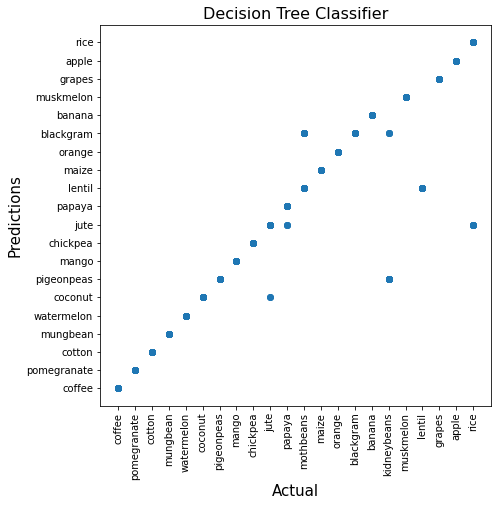

In [248]:
scatter_plot('Decision Tree Classifier',Ytrue,Ypred)

## Saving trained Decision Tree model


In [249]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models\DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [250]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [251]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

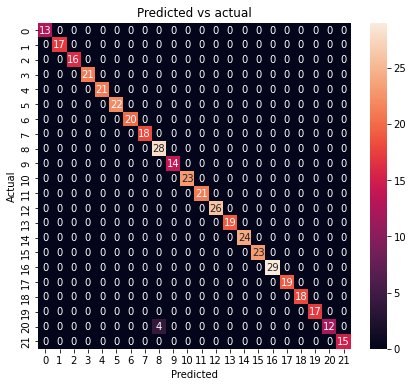

In [252]:
Ypred = NaiveBayes.predict(Xtest)
Ytrue = Ytest

cm_dt = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm_dt, annot=True, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

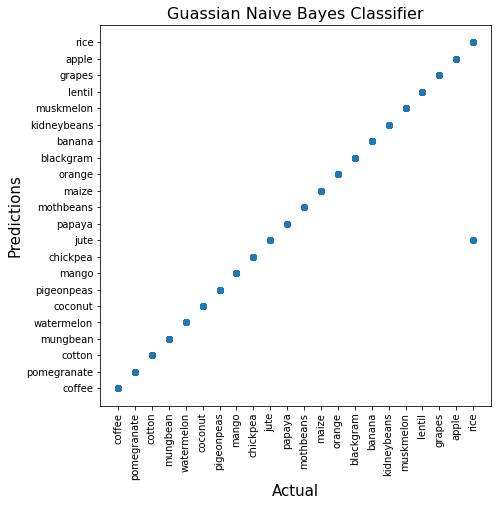

In [253]:
scatter_plot('Guassian Naive Bayes Classifier',Ytrue,Ypred)

## Saving trained Guassian Naive Bayes model

In [254]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = r'models\NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)


In [255]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.83      0.89      0.86        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

In [256]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

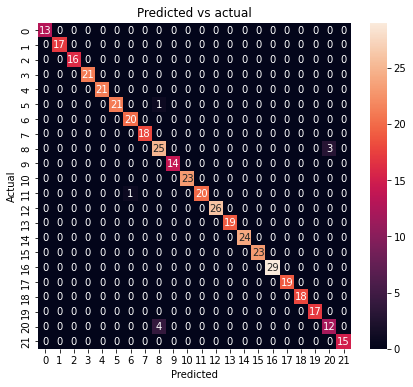

In [257]:
Ypred = predicted_values
Ytrue = Ytest

cm_dt = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm_dt, annot=True, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

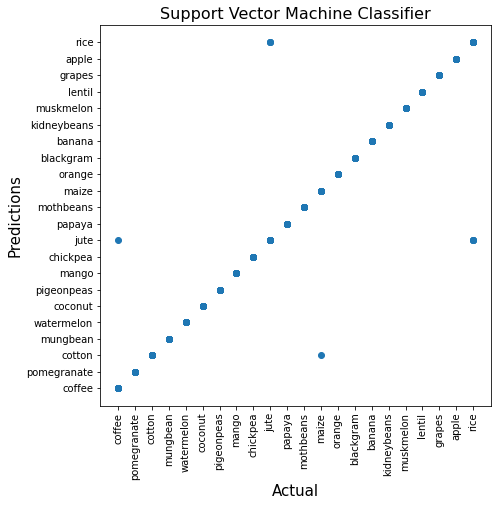

In [258]:
scatter_plot('Support Vector Machine Classifier',Ytrue,Ypred)

## Saving trained SVM model


In [259]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = r'models\SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [260]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00   

In [261]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

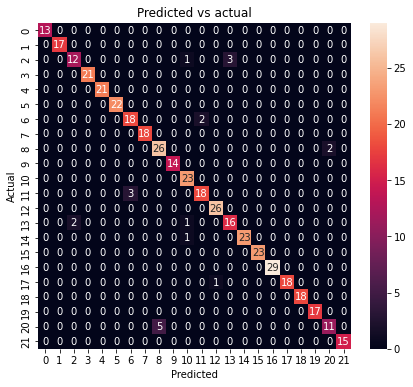

In [262]:
Ypred = LogReg.predict(Xtest)
Ytrue = Ytest

cm_dt = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm_dt, annot=True, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

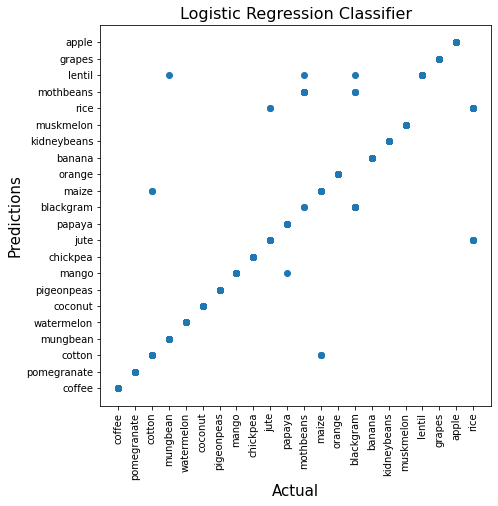

In [263]:
scatter_plot('Logistic Regression Classifier',Ytrue,Ypred)

## Saving trained Logistic Regression model

In [264]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'models\LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [266]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

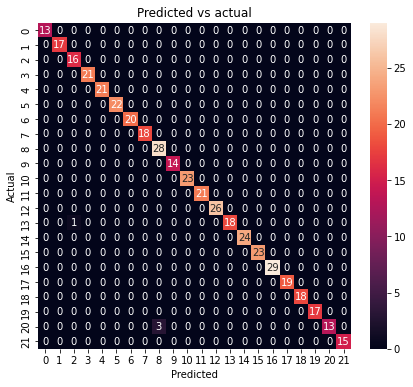

In [267]:
Ypred = RF.predict(Xtest)
Ytrue = Ytest

cm_dt = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm_dt, annot=True, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

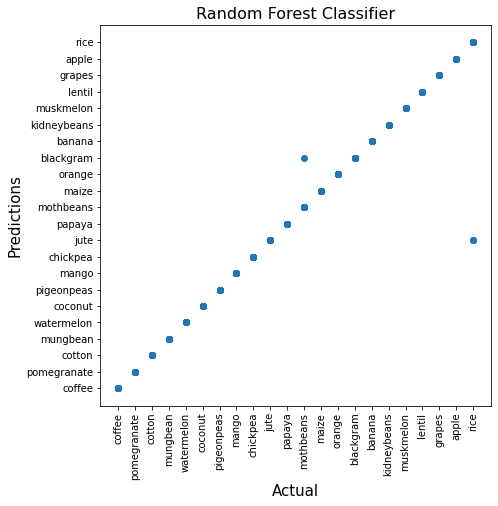

In [268]:
scatter_plot('Random Forest Classifier',Ytrue,Ypred)

## Saving trained Random Forest model


In [269]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'models\RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XG Boost

In [270]:
# import xgboost as xgb
from xgboost import XGBClassifier

XB = XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

In [271]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

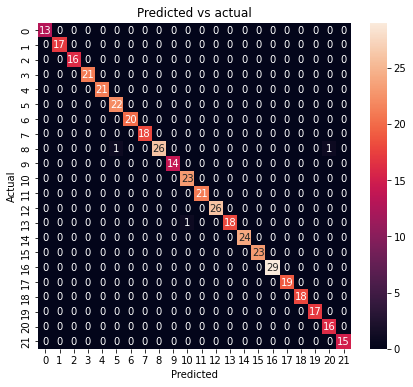

In [272]:
Ypred = XB.predict(Xtest)
Ytrue = Ytest
from sklearn.metrics import confusion_matrix

cm_XB = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm_XB, annot=True, fmt=".0f", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

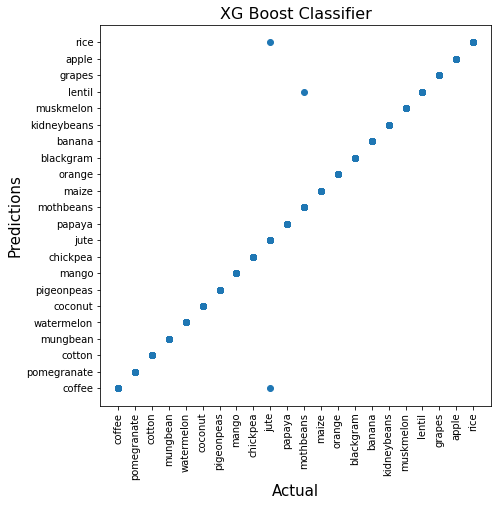

In [273]:
scatter_plot('XG Boost Classifier',Ytrue,Ypred)

## Saving trained XGBoost model

In [274]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'models\XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# k-Nearest Neighbors (kNN)

In [275]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsClassifier as KNN

kNN = KNeighborsClassifier(n_neighbors = 7)
kNN.fit(Xtrain,Ytrain)

predicted_values = kNN.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('kNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.89      0.89        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

In [276]:
# Cross validation score (kNN)
score = cross_val_score(kNN,features,target,cv=5)
score

array([0.96818182, 0.98409091, 0.98409091, 0.975     , 0.97954545])

In [277]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
kNN_pkl_filename = 'models\kNN.pkl'
# Open the file to save as pkl file
kNN_Model_pkl = open(kNN_pkl_filename, 'wb')
pickle.dump(kNN, kNN_Model_pkl)
# Close the pickle instances
kNN_Model_pkl.close()

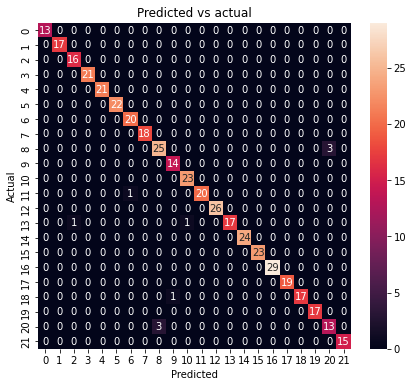

In [278]:
Ypred = kNN.predict(Xtest)
Ytrue = Ytest
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm_knn, annot=True, fmt=".0f", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

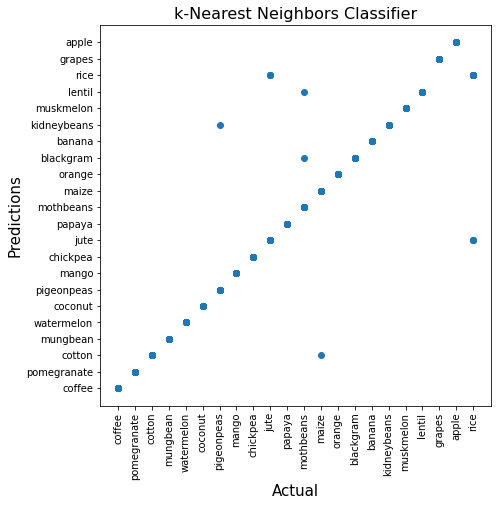

In [279]:
scatter_plot('k-Nearest Neighbors Classifier',Ytrue,Ypred)

# Accuracy Comparison

In [280]:
print(acc)

[0.9, 0.990909090909091, 0.9795454545454545, 0.9522727272727273, 0.990909090909091, 0.9931818181818182, 0.9772727272727273]


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

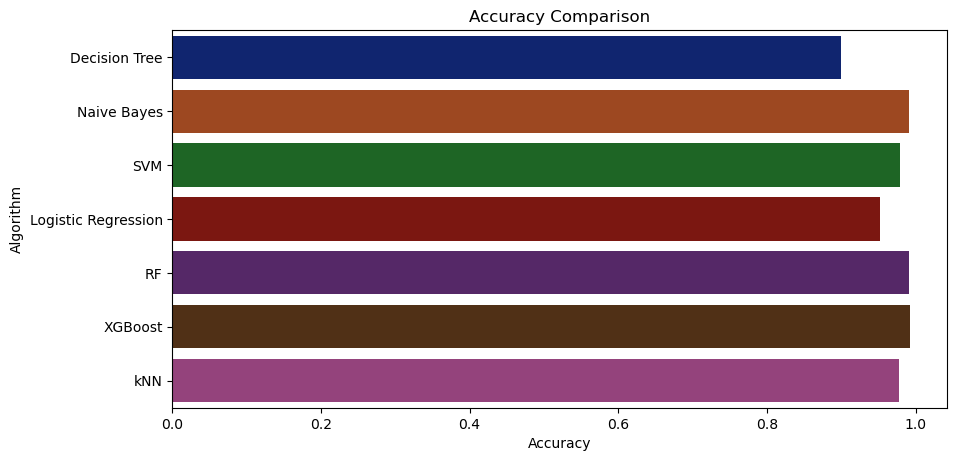

In [281]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [282]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182
kNN --> 0.9772727272727273


# Making a prediction


In [283]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

[5]


In [284]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

[8]


# Neural Network

In [285]:
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Dropout
from keras.optimizers import Adam

modelNN = Sequential()
# model.add(InputLayer(input_shape=(7,)))
# adding hidden layers with number of units and activation function.
# model.add(LSTM(units = 64, activation = 'relu',input_shape=(7,1))) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
# model.add(Flatten())
# model.add(Dense(units = 32, activation = 'relu')) #hiddenlayer2
# model.add(Dense(units = 22, activation = 'sigmoid')) #outputlayer

# model.add(Dense(units = 64, activation = 'relu', input_dim = 7)) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
# model.add(Dense(units = 32, activation = 'relu')) #hiddenlayer2
# model.add(Dense(units = 22, activation = 'sigmoid')) #outputlayer

modelNN.add(Dense(64, input_dim=7, activation='relu'))
modelNN.add(Dropout(0.2))
modelNN.add(Dense(32, activation='relu'))
modelNN.add(Dense(22, activation='softmax'))

# compiling our model.
modelNN.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy']) #metrics are the list of parameters on which we test our model like accuracy.
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [286]:
modelNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 22)                726       
                                                                 
Total params: 3318 (12.96 KB)
Trainable params: 3318 (12.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [287]:
modelNN.fit(Xtrain, Ytrain, epochs=40, batch_size=8, validation_data=(Xtest, Ytest))

Epoch 1/40
220/220 [==============================] - 2s 4ms/step - loss: 9.3023 - accuracy: 0.0784 - val_loss: 2.8765 - val_accuracy: 0.1591
Epoch 2/40
220/220 [==============================] - 1s 3ms/step - loss: 3.2867 - accuracy: 0.1068 - val_loss: 3.0043 - val_accuracy: 0.0841
Epoch 3/40
220/220 [==============================] - 1s 3ms/step - loss: 2.8862 - accuracy: 0.1301 - val_loss: 2.6786 - val_accuracy: 0.1773
Epoch 4/40
220/220 [==============================] - 1s 3ms/step - loss: 2.5507 - accuracy: 0.2017 - val_loss: 2.2370 - val_accuracy: 0.2818
Epoch 5/40
220/220 [==============================] - 1s 3ms/step - loss: 2.1252 - accuracy: 0.2858 - val_loss: 1.4403 - val_accuracy: 0.5182
Epoch 6/40
220/220 [==============================] - 1s 3ms/step - loss: 1.4788 - accuracy: 0.4653 - val_loss: 0.9578 - val_accuracy: 0.6227
Epoch 7/40
220/220 [==============================] - 1s 3ms/step - loss: 1.0621 - accuracy: 0.5858 - val_loss: 0.7112 - val_accuracy: 0.6977
Epoch 

## Model Evaluation

In [288]:
# printing score with evaluate
print(modelNN.evaluate(Xtest, Ytest)[1])

14/14 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9636
0.9636363387107849


In [289]:
y_pred_con = modelNN.predict(Xtest)
y_pred = []

for j in y_pred_con:
    y_pred.append(np.argmax(j))
    
pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = Ytest
pred_df

14/14 [==============================] - 0s 2ms/step


,Pred_class,Correct_class
0,5,5
1,19,19
2,19,19
3,6,6
4,14,14
...,...,...
435,16,16
436,15,15
437,10,10
438,9,9


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.81      0.87      0.84        15
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      0.83      0.88        23
           7       1.00      1.00      1.00        18
           8       0.96      0.84      0.90        32
           9       1.00      1.00      1.00        14
          10       1.00      0.92      0.96        25
          11       0.81      0.94      0.87        18
          12       1.00      1.00      1.00        26
          13       0.89      0.94      0.92        18
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

Text(42.0, 0.5, 'Truth')

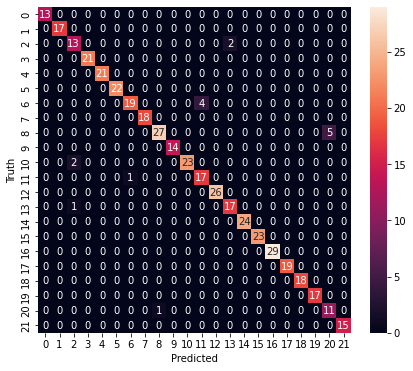

In [290]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import tensorflow as tf
print(classification_report(y_pred, Ytest))
cm = tf.math.confusion_matrix(y_pred, Ytest)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [291]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_absolute_percentage_error
print(accuracy_score(y_pred, Ytest))
print(mean_absolute_error(y_pred, Ytest))
print(mean_squared_error(y_pred, Ytest))
print(max_error(y_pred, Ytest))

0.9636363636363636
0.33181818181818185
3.3636363636363638
12


In [292]:
acc.append(accuracy_score(y_pred, Ytest))
model.append('ANN')

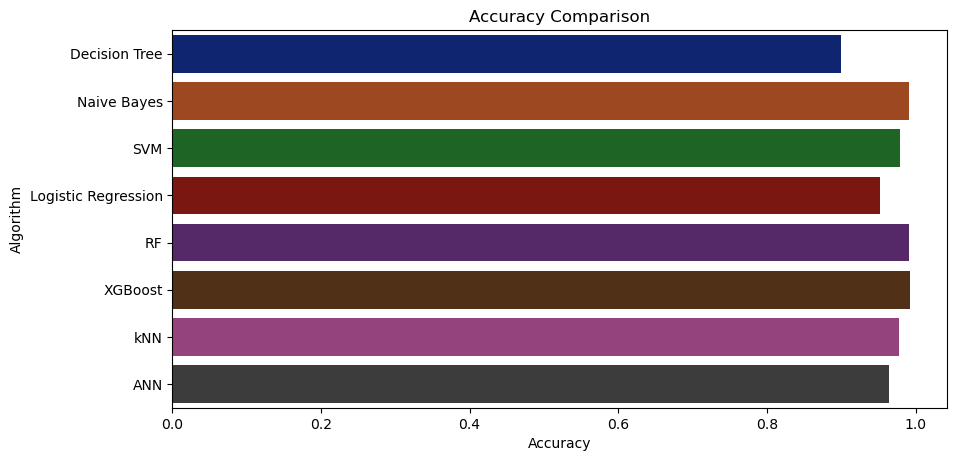

In [293]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark');